# Sentiment Classification with ELMo Embeddings

In [1]:
import pandas as pd
import numpy as np
import spacy
import texthero as hero
from tqdm import tqdm
import re
import time
import pickle
pd.set_option('display.max_colwidth', 200)

In [2]:
df_train = pd.read_csv('../Data/train_2kmZucJ.csv')
df_test = pd.read_csv('../Data/test_oJQbWVk.csv')

In [3]:
df_train['label'].value_counts(normalize = True)

0    0.744192
1    0.255808
Name: label, dtype: float64

In [4]:
df_train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [5]:
# Preprocessing
# remove URL's from train and test
df_train['clean_tweet'] = df_train['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

df_test['clean_tweet'] = df_test['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

In [6]:
# Cleaning with text hero

df_train['clean_tweet'] = df_train['clean_tweet'].pipe(hero.clean)
df_test['clean_tweet'] = df_test['clean_tweet'].pipe(hero.clean)

In [7]:
df_train.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love would go talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george made way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,amazing service apple even talk question unless pay stupid support


In [8]:
# Load Spacy 
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [9]:
def lemmatize(texts):
    output = []
    for doc in texts:
        s = [token.lemma_ for token in nlp(doc)] 
        output.append(' '.join(s))
    return output

In [10]:
df_train['clean_tweet'] = lemmatize(df_train['clean_tweet'])
df_test['clean_tweet'] = lemmatize(df_test['clean_tweet'])

In [11]:
df_train.sample(10)

,id,label,tweet,clean_tweet
4888,4889,1,When your new phone has even more problems than the old one #awesome,new phone even problem old one awesome
4775,4776,0,In love #new #macbook #pro #retina #display #so #lucky #and #woo #apple #laptop… http://instagram.com/p/jFEWwYE0Ry/,love new macbook pro retina display lucky woo apple laptop ...
6173,6174,0,New camera #iphone #iphone4 #iphone4S #camera #like #hermoso #pic #photo #photograpy #instalike #i http://instagr.am/p/TwNpJjCQsu/,new camera iphone iphone4 iphone4s camera like hermoso pic photo photograpy instalike
4316,4317,1,"Was gonna walk again, but my #Apple & Apple-related devices are such pieces of crap, was annoyed beyond sticking it out.",go to walk apple apple relate device piece crap annoy beyond stick
251,252,0,"Finally, #iPhone Will Be #Dominated by I-PHONE(S) #apple #ios #android #iphonex #market #chinese #smartphone https://techinwire.com/2017/09/21/finally-iphone-will-be-dominated-by-i-phones/ …pic.tw...",finally iphone dominate phone apple ios android iphonex market chinese smartphone ... pic twitter com grc1o4hbsc
6649,6650,0,My lost iPad - finaly home in my hands #apple #ipad #macbook #style #hate #police @ Starbucks http://instagram.com/p/jJcxM5m-jc/,lose ipad finaly home hand apple ipad macbook style hate police starbuck
3044,3045,0,Reposting @massive_tech: #presdak #iphonecase #samsungcase #followme #iphone #Samsung #phonecase #follow #follow4followpic.twitter.com/aq2qfvjbIo,reposte massive tech presdak iphonecase samsungcase followme iphone samsung phonecase follow follow4followpic twitter com aq2qfvjbio
2632,2633,1,"Fuck you #apple. You've made a phone that breaks if you sneeze on it, literally #SteveJobs #androidnextime #imgladstevejobsdied",fuck apple make phone break sneeze literally stevejobs androidnextime imgladstevejobsdie
3291,3292,1,I hate ios8 so much right now! Nothing on my phone has worked properly since installing by it! The fix didn't FIX anything! #Apple,hate ios8 much right nothing phone work properly since instal fix fix anything apple
5856,5857,0,Got this today #phone #smartphone #samsung #android #jellybean #galaxy #s4 #photooftheday… http://instagram.com/p/cieRuxiz2w/,get today phone smartphone samsung android jellybean galaxy s4 photooftheday ...


In [12]:
# Download ELMo

import tensorflow as tf 
import tensorflow_hub as hub 
import tensorflow.compat.v1 as tf1
tf1.disable_eager_execution()
tf1.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
y_train = tf.keras.utils.to_categorical(df_train.label.values)
# y_test = tf.keras.utils.to_categorical(df_test.label.values)

In [16]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [17]:
## test sample sentences
embeddings = elmo(["apple pineapple orange juice", "apple pineapple juice"],  signature="default", as_dict=True)["elmo"]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [18]:
embeddings.shape

TensorShape([Dimension(2), Dimension(4), Dimension(1024)])

In [19]:
from cachetools import TTLCache,cached
cache = TTLCache(maxsize=100, ttl=21600)

@cached(cache)
def ELMoEmbedding(x):
    return elmo(tf.reshape(tf.cast(x,tf.string),[-1]),signature='default',as_dict=True)['elmo']

In [28]:


def create_model_architecture():
    input_text = tf.keras.layers.Input(shape=(1,), dtype='string',name='input_text')
    embedding = tf.keras.layers.Lambda(ELMoEmbedding,output_shape = (1024,), name = 'elmo_embedding')(input_text)

    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1024,return_sequences=False,recurrent_dropout=0.2,dropout=0.2,name="BiLSTM"))(embedding)
    x = tf.keras.layers.Dense(512,activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    # x = embedding
    x = tf.keras.layers.Dense(256,activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(2,activation='softmax')(x)
    # predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

    model = tf.keras.Model(inputs = [input_text],outputs = predictions)
    
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model

In [29]:
model = create_model_architecture()
model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      [(None, 1)]               0         
_________________________________________________________________
elmo_embedding (Lambda)      (None, None, 1024)        0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 2048)              16785408  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 

In [30]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [49]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(tf.compat.v1.tables_initializer())
    # history = model.fit(np.asarray(df_train.clean_tweet),y_train,epochs=5,batch_size = 2,validation_split=0.2)
    history = model.fit(np.asarray(df_train.clean_tweet),np.asarray(df_train.label.values),epochs=3,batch_size = 32,validation_split=0.2)
    model.save_weights('../models/model_elmo_weights.h5')

Train on 6336 samples, validate on 1584 samples
Epoch 1/3
6336/6336 [==============================] - 71s 11ms/sample - loss: 0.3583 - acc: 0.8428 - val_loss: 0.2705 - val_acc: 0.8756
Epoch 2/3
6336/6336 [==============================] - 72s 11ms/sample - loss: 0.2777 - acc: 0.8799 - val_loss: 0.2514 - val_acc: 0.8889
Epoch 3/3
6336/6336 [==============================] - 72s 11ms/sample - loss: 0.2457 - acc: 0.8905 - val_loss: 0.2588 - val_acc: 0.8870


In [50]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


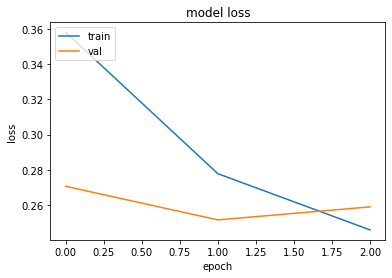

In [53]:
import matplotlib.pyplot as plt 
plt.plot(np.arange(3),history.history['loss'])
plt.plot(np.arange(3),history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

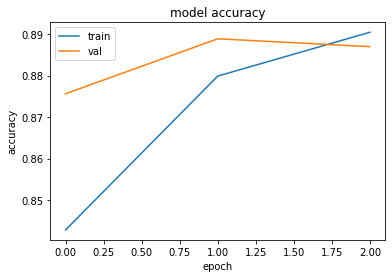

In [54]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()